In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


https://www.kaggle.com/datasets/amitvkulkarni/impact-of-product-positioning-on-sales

* Product Position: Describes the location within the store where the product is placed, such as "Front of Store," "End-cap," or "Aisle."
* Price: Indicates the price of the product.
* Competitor's Price: Specifies the price of similar products offered by competitors.
* Promotion: Indicates whether the product is part of a promotional campaign, with values "Yes" or "No."
* Foot Traffic: Represents the level of foot traffic in the vicinity of the product's location, categorized as "High," "Medium," or "Low."
* Consumer Demographics: Describes the characteristics of the consumers purchasing the product, such as "Young adults," "Families," "Seniors," or "College students."
* Product Category: Specifies the category to which the product belongs, such as "Food," "Electronics," or "Clothing."
* Seasonal: Indicates whether the product is seasonal, with values "Yes" or "No."
* Sales Volume: Represents the number of units of the product sold within a specific time period.

In [2]:
data = pd.read_csv('Data/Product Positioning.csv')
data.head()

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


In [3]:
data.shape

(1000, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [32]:
print(px.__version__)

AttributeError: module 'plotly.express' has no attribute '__version__'

 price of clothing products , seasonal == no, promotion == yes 
 x price
 y position

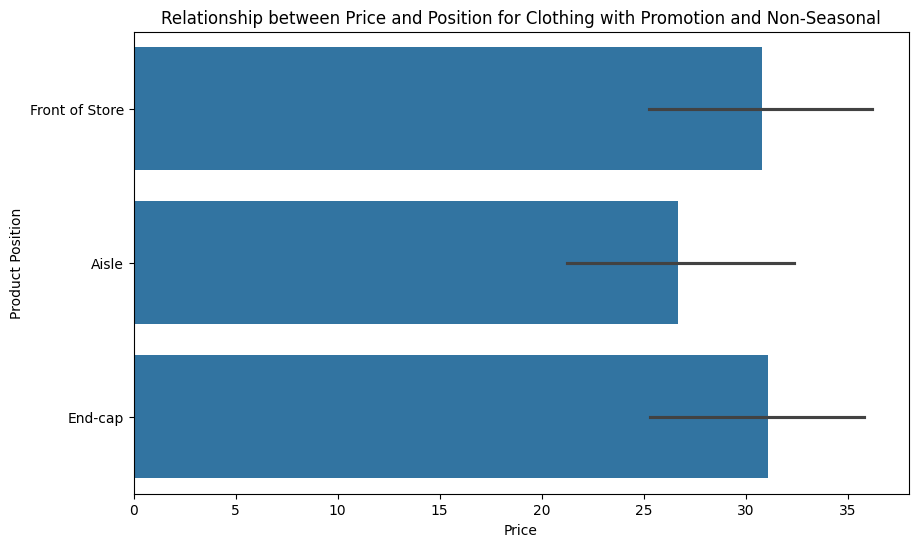

In [22]:
filtered_data = data[(data['Product Category']=='Clothing')&
                     (data['Promotion']=='Yes')&
                     (data['Seasonal']=='No')&
                     (data['Product Position'])]
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='Price', y='Product Position')
plt.title('Relationship between Price and Position for Clothing with Promotion and Non-Seasonal')
plt.xlabel('Price')
plt.ylabel('Product Position')

plt.show()

In [33]:
data['Product Position'].unique()

array(['Aisle', 'End-cap', 'Front of Store'], dtype=object)